### Step
First, you must install the packages and set the necessary environment variables.

### Installation
Install LangChian's Python libaray, `langchain`.

In [1]:
#!pip install --quiet langchain

install LangChain's intergration package for Gemini,  langchain-google-genai.

In [2]:
!pip install --quiet google-cloud-aiplatform


In [4]:
# install langchain-goole-vertexai
%pip install --upgrade --quiet langchain-core langchain-google-vertexai

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Restart kernel after install so than you environment can access the new packages
import IPython
import time
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Grab an Cerdentials
You will set the environment variable GOOGLE_APPLICATION_CREDENTIALS to configure vertex AI


In [2]:
import vertexai
import os
import IPython
from vertexai import generative_models
from vertexai.generative_models import GenerativeModel, ChatSession
# load google access config file
credential_path="/Users/gongbiao/Code/vertex-ai/config/google_access_token_cp.json"
if os.path.exists(credential_path):
    print(f"the config load success")
else:
    print("config file does'not exists!")
    
# init vertex ai
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path
project_id = "gen-lang-client-0115788367"
location = "us-central1"
vertexai.init(project=project_id, location=location)


the config load success


In [3]:
# [Optinal] set proxy
proxy = "http://127.0.0.1:8889"
os.environ["HTTP_PROXY"] = proxy
os.environ["HTTPS_PROXY"] = proxy
os.environ["http_proxy"] = proxy
os.environ["https_proxy"] = proxy

In [19]:
### To specify a particular model version



# To specify a particular model version
model = GenerativeModel(model_name="gemini-1.5-pro-001")
chat = model.start_chat(response_validation=False)
safety_settings = {
}

# Traditional offical sdk calling method
def get_chat_response(prompt_text) -> str:
    model_response = model.generate_content(
        [prompt_text],
        generation_config={
            "max_output_tokens": 8192,
            "temperature": 0.0,
            "top_p": 1,
            "top_k": 32,
        },
        safety_settings={
            generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
            generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
            generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
            generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        },
        stream=False,
    )
    return model_response.text


In [20]:
prompt= "Hello do you know chengdu city?"
print(get_chat_response(prompt))

Yes, I do!  Chengdu is a fascinating city.  Tell me, what would you like to know about it?  I can tell you about:

* **Its history:** Chengdu is an ancient city with a rich history dating back over 2,000 years.
* **Its culture:** Chengdu is known for its laid-back lifestyle, delicious food, and tea culture.
* **Its attractions:**  From the giant pandas to ancient temples, Chengdu has something for everyone.
* **Practical information:**  Like how to get there, where to stay, and what the weather is like.

What aspects of Chengdu are you most interested in? 😊 



### Usage Langchain
Vertext AI suports all LLM functionality

In [4]:
from langchain_google_vertexai import VertexAI
# To use model
model = VertexAI(model_name="gemini-1.5-pro-001")


In [5]:
message = "What are some of the pros and cons of Python as a programming language?"
model.invoke(message)

"## Python Pros:\n\n* **Beginner-Friendly:** Python's syntax is clear, concise, and reads like English, making it easier to learn and understand, especially for beginners.\n* **Large and Active Community:** Python boasts a vast and supportive community, offering ample resources, tutorials, and libraries for learning and problem-solving.\n* **Extensive Libraries:** Python has a rich ecosystem of libraries catering to diverse needs, from web development (Django, Flask) to data science (NumPy, Pandas, Scikit-learn) and machine learning (TensorFlow, PyTorch).\n* **Versatile and Cross-Platform:** Python"

In [6]:
await model.ainvoke(message)

'## Python: Pros and Cons\n\nPython is a popular, versatile programming language known for its readability and beginner-friendliness. However, like any language, it has its strengths and weaknesses.\n\n**Pros:**\n\n* **Readability and Simplicity:** Python emphasizes clear syntax and uses English-like keywords, making it easy to learn, read, and write. This reduces development time and improves maintainability.\n* **Large and Active Community:** Python boasts a vast and supportive community that contributes to its extensive libraries, frameworks, and resources. This makes finding solutions and getting help easier.\n* **Extensive Libraries and Frameworks:** Python offers a'

In [8]:
for chunk in model.stream(message):
    print(chunk, end="", flush=True)

## Python Pros:

* **Beginner-Friendly:** Python's syntax is clear, concise, and reads like English, making it easier to learn and understand, especially for beginners.
* **Large and Active Community:** Python boasts a vast and supportive community, offering ample resources, tutorials, and libraries for assistance.
* **Extensive Libraries:** Python has a rich ecosystem of libraries catering to diverse needs, from web development (Django, Flask) to data science (NumPy, Pandas, Scikit-learn) and more.
* **Versatile and Cross-Platform:** Python is a versatile language used for web development, data analysis

In [ ]:
model.batch([message])

### OPTIONAL: Managing Safety Attributes
- if your use cause requires your to manage thresholds for saftey attributes, you can do so using below snippetes
> NOTE: We recommend exercising exterme caution when adjusting Safetly Attributes thresholds

In [13]:
# from langchain_google_vertexai import HarmBlockThreshold, HarmCategory

# safety_settings = {
#     HarmCategory.HARM_CATEGORY_UNSPECIFIED: HarmBlockThreshold.BLOCK_NONE,
#     HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
#     HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
#     HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
#     HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
# }

# llm = VertexAI(model_name="gemini-1.5-pro-001", safety_settings=safety_settings)
# # invoke a model response
# # output = llm.invoke(["How to make a molotov cocktail?"])
# output = llm.invoke(["How are you?"])


### You can also easily combine with a prompt template for easy structruing of user input.

In [17]:
from langchain_core.prompts import PromptTemplate
template = """Question: {question}
Answer: Let's think step by step."""
prompt = PromptTemplate.from_template(template)

chain = prompt | model
question = """
I have five apples. I throw two away. I eat tow. How many apples do I have left?
"""
print(chain.invoke({"question": question}))


You're right to think step-by-step! Here's how to solve it:

* **Start:** You have 5 apples.
* **Throw away:** You throw away 2, so you have 5 - 2 = 3 apples left.
* **Eat:** You eat 2.  You had 3 and ate 2, so you have 3 - 2 = 1 apple left.

**Answer:** You have 1 apple left. 



### You can use different foundational models for specialized in different tasks. For an updated list of avaliable models visit 

In [21]:
llm = VertexAI(model_name="code-bison", max_tokens=1000, temperature=0.3)
question = "Write a python function that check if a string is a valid 11 digits phone number"
# invoke a model response
print(model.invoke(question))


```python
import re

def is_valid_phone_number(phone_number):
  """
  Checks if a string is a valid 11-digit phone number.

  Args:
    phone_number: The string to check.

  Returns:
    True if the string is a valid 11-digit phone number, False otherwise.
  """

  # Remove any spaces, hyphens, or parentheses from the phone number
  cleaned_number = re.sub(r'[-\s().]', '', phone_number)

  # Check if the cleaned number is 


### Let's double-check it's a cat:)

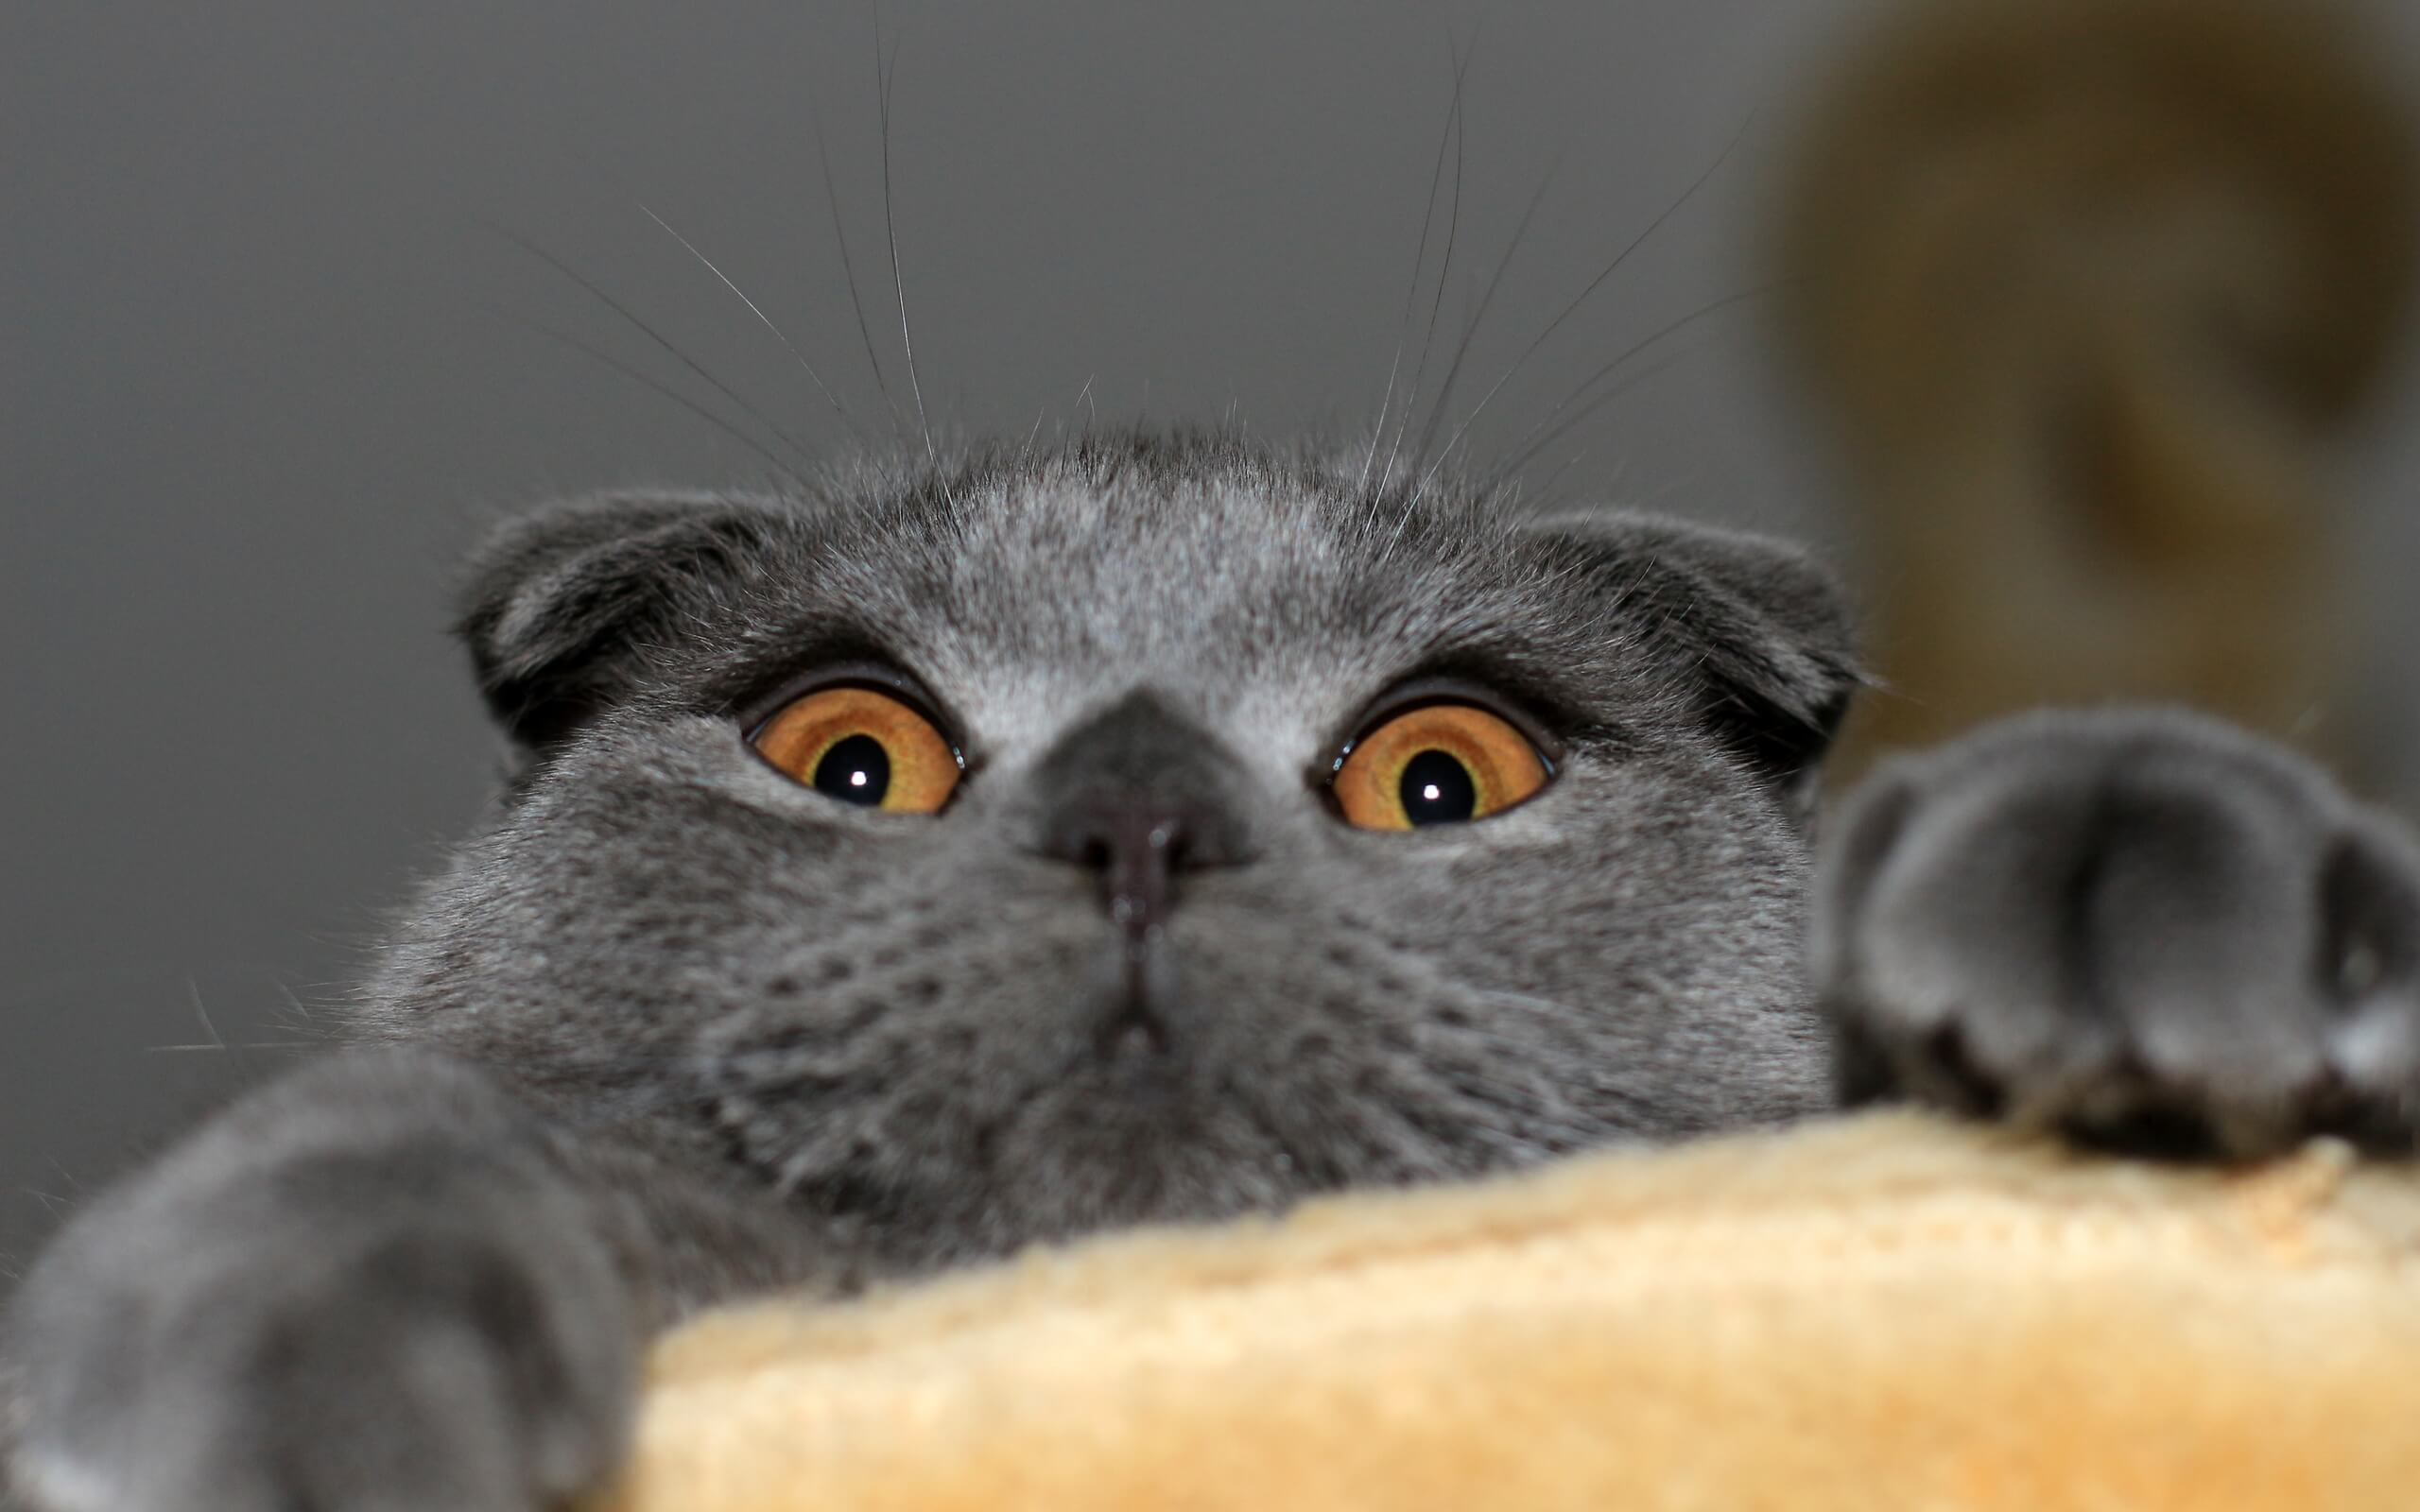

In [28]:
# from vertexai.preview.generative_models import Image
one_image = Image.load_from_file("example_01.jpeg")
one_image
# from pathlib import Path
# print(Path.cwd())

 You can also pass images as bytes:


In [ ]:
# import base64
# from langchain_core.messages import HumanMessage
# with open("example_01.jpeg", "rb") as image_file:
#     image_bytes = image_file.read()

# base64_image = base64.b64encode(image_bytes).decode('utf-8')
# image_url = f"data:image/jpeg;base64,{base64_image}"

# content = [
#     {
#         "type": "text",
#         "text": "What is shown in this image?"
#     },
#     {
#         "type": "image_url",
#         "image_url": {"url": image_url}
#     }
# ]

# # Prepare input for model consumption
# message = HumanMessage(content=[text_message, image_message])

# # invoke a model response
# output = llm.invoke([message])
# print(output.content)

### Chain of Thought-Sample

In [4]:
import vertexai
import os
import IPython
from langchain.llms import VertexAI
from IPython.display import display, Markdown

# init vertex ai
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path
project_id = "gen-lang-client-0115788367"
location = "us-central1"
vertexai.init(project=project_id, location=location)

In [6]:
llm = VertexAI(model_name="text-bison", max_output_tokens=1000)


In [7]:
llm.predict(
    "Improve this description : In this notebook we'll explore advanced prompting techniques, and building ReAct agents using LangChain and Vertex AI "
)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


" **Explore Advanced Prompting Techniques and Build ReAct Agents with LangChain and Vertex AI**\n\nIn this notebook, we'll delve into the world of advanced prompting techniques and discover how to construct ReAct agents using LangChain and Vertex AI. We'll embark on a journey to enhance our understanding of natural language processing and explore the cutting-edge capabilities of these powerful tools.\n\n**Key Highlights:**\n\n- **Advanced Prompting Techniques:** Discover the art of crafting effective prompts that can unlock the full potential of language models. Learn how to fine-tune your prompts for specific tasks and achieve remarkable results.\n\n- **Building ReAct Agents with LangChain:** Explore the power of LangChain, a revolutionary framework for building ReAct agents. Gain hands-on experience in constructing agents that can interact with users in a natural and intelligent manner.\n\n- **Vertex AI Integration:** Harness the capabilities of Vertex AI, Google's state-of-the-art A

### Chain of Thought - Sample

In [9]:
question = """Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls.
Each can has 3 tennis balls. How many tennis balls does he have now?
A: The answer is 11.
Q: The cafeteria had 23 apples.
If they used 20 to make lunch and bought 6 more, how many apples do they have?
A:"""

llm.predict(question)

' The answer is 9.'

Rewriting the prompt to include a chain of thought shows the LLM how to decompose the question into multiple simple steps of reasoning.

The model response then follows a similar chain of thought, increasing the likelihood of a correct answer.


In [10]:
question = """Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls.
Each can has 3 tennis balls. How many tennis balls does he have now?
A: Roger started with 5 balls. 2 cans of 3 tennis balls
each is 6 tennis balls. 5 + 6 = 11. The answer is 11.
Q: The cafeteria had 23 apples.
If they used 20 to make lunch and bought 6 more, how many apples do they have?
A:"""

llm.predict(question)

' The cafeteria started with 23 apples. They used 20 apples for lunch, so they had 23 - 20 = 3 apples left. They then bought 6 more apples, so they now have 3 + 6 = 9 apples. The answer is 9.'